In [40]:
import pandas as pd

# Load the dataset with error handling
try:
    data = pd.read_csv('dataset.csv', on_bad_lines='skip', engine='python')
except pd.errors.ParserError as e:
    print(f"Error parsing file: {e}")

# Combine Category and Sub-Category into a single feature
data['Cat_SubCat'] = data['Category'] + '-' + data['Sub-Category']

# Count the occurrences of each category-subcategory combination
category_subcategory_counts = data['Cat_SubCat'].value_counts()

# Convert the Series to a DataFrame for better readability
category_subcategory_counts_df = category_subcategory_counts.reset_index()
category_subcategory_counts_df.columns = ['Cat_SubCat', 'Count']

# Function to safely split the combined feature into category and subcategory
def safe_split(cat_subcat):
    parts = cat_subcat.split('-', 1)
    if len(parts) == 2:
        return parts
    else:
        return [cat_subcat, '']

# Apply safe_split to each combined feature
category_subcategory_counts_df[['Category', 'Sub-Category']] = category_subcategory_counts_df['Cat_SubCat'].apply(safe_split).apply(pd.Series)

# Drop the combined feature column as we now have separate columns
category_subcategory_counts_df = category_subcategory_counts_df.drop(columns=['Cat_SubCat'])

# Save the DataFrame to a CSV file without any modifications
category_subcategory_counts_df.to_csv('category_subcategory_counts.csv', index=False)

# Print the resulting DataFrame
print(category_subcategory_counts_df)

# Optionally, you can filter the results to show counts for a specific category-subcategory pair
specific_pair = ('Fitness & Wellness', 'Gym')
specific_count = category_subcategory_counts_df[
    (category_subcategory_counts_df['Category'] == specific_pair[0]) & 
    (category_subcategory_counts_df['Sub-Category'] == specific_pair[1])
]['Count'].values

if len(specific_count) > 0:
    print(f"The count for {specific_pair} is: {specific_count[0]}")
else:
    print(f"The count for {specific_pair} is: 0")


    Count               Category        Sub-Category
0     280  Educational Institute              School
1     280  Educational Institute      Tuition Center
2     280     Fitness & Wellness                 Gym
3     278  Educational Institute          University
4     278  Educational Institute             College
..    ...                    ...                 ...
89      5               Hospital  Specialty Hospital
90      5          Shopping Mall       Jewelry Store
91      5          Shopping Mall  Departmental Store
92      4                  Hotel        Budget Hotel
93      2       Pilgrimage Place           Monastery

[94 rows x 3 columns]
The count for ('Fitness & Wellness', 'Gym') is: 280


In [15]:
import pandas as pd

# Load the dataset with error handling
try:
    data = pd.read_csv('dataset.csv', on_bad_lines='skip', engine='python')
except pd.errors.ParserError as e:
    print(f"Error parsing file: {e}")

# Combine Category and Sub-Category into a single feature
data['Cat_SubCat'] = data['Category'] + '-' + data['Sub-Category']

# Count the occurrences of each category-subcategory combination
category_subcategory_counts = data['Cat_SubCat'].value_counts()

# Convert the Series to a DataFrame for better readability
category_subcategory_counts_df = category_subcategory_counts.reset_index()
category_subcategory_counts_df.columns = ['Cat_SubCat', 'Count']

# Function to safely split the combined feature into category and subcategory
def safe_split(cat_subcat):
    parts = cat_subcat.split('-', 1)
    if len(parts) == 2:
        return parts
    else:
        return [cat_subcat, '']

# Apply safe_split to each combined feature
category_subcategory_counts_df[['Category', 'Sub-Category']] = category_subcategory_counts_df['Cat_SubCat'].apply(safe_split).apply(pd.Series)

# Drop the combined feature column as we now have separate columns
category_subcategory_counts_df = category_subcategory_counts_df.drop(columns=['Cat_SubCat'])

# Sort the DataFrame by 'Count' in descending order
category_subcategory_counts_df = category_subcategory_counts_df.sort_values(by='Count', ascending=False)

# Extract tuples of (Category, Sub-Category) in order of count
category_subcategory_tuples = list(zip(category_subcategory_counts_df['Category'], category_subcategory_counts_df['Sub-Category']))

# Print the list of tuples
print(category_subcategory_tuples)

# Optionally, you can filter the results to show counts for a specific category-subcategory pair
specific_pair = ('Fitness & Wellness', 'Gym')
specific_count = category_subcategory_counts_df[
    (category_subcategory_counts_df['Category'] == specific_pair[0]) & 
    (category_subcategory_counts_df['Sub-Category'] == specific_pair[1])
]['Count'].values

if len(specific_count) > 0:
    print(f"The count for {specific_pair} is: {specific_count[0]}")
else:
    print(f"The count for {specific_pair} is: 0")


[('Educational Institute', 'School'), ('Educational Institute', 'Tuition Center'), ('Fitness & Wellness', 'Gym'), ('Educational Institute', 'University'), ('Educational Institute', 'College'), ('Educational Institute', 'Art School'), ('Educational Institute', 'Music School'), ('Fitness & Wellness', 'Yoga Studio'), ('Educational Institute', 'Driving School'), ('Educational Institute', 'Dance School'), ('Outdoor Space', 'Park'), ('Restaurant', 'Cafe'), ('Office', 'Advertising Agency'), ('Office', 'Travel Agency'), ('Office', 'Law Firm'), ('Transportation', 'Taxi Stand'), ('Restaurant', 'Bakery'), ('Restaurant', 'Ice Cream Parlor'), ('Transportation', 'Bus Stop'), ('Financial Institution', 'Bank'), ('Financial Institution', 'ATM'), ('Office', 'Media Company'), ('Shop', 'Pharmacy'), ('Office', 'Corporate Office'), ('Outdoor Space', 'Garden'), ('Restaurant', 'Fast Food'), ('Transportation', 'Airport'), ('Restaurant', 'Bar'), ('Restaurant', 'Buffet'), ('Shop', 'Hardware Store'), ('Office', '

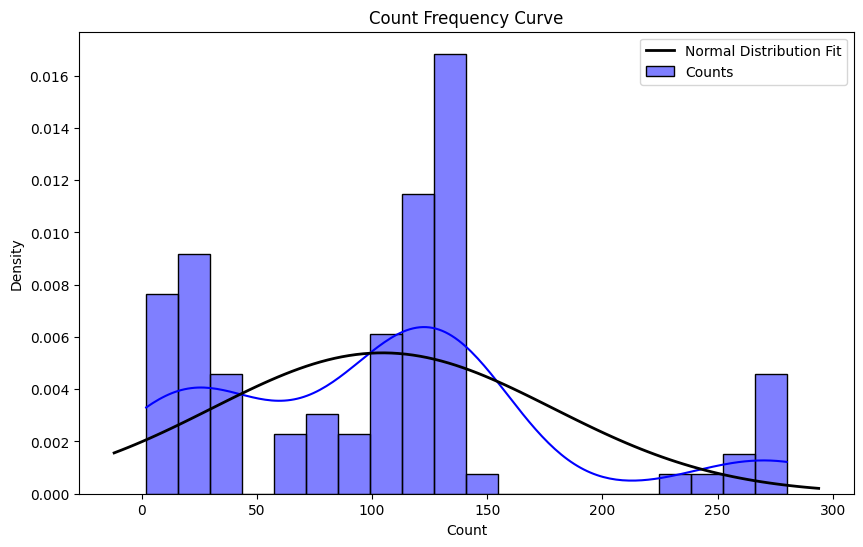

Statistic=0.8865820232533201, p-value=6.774906287998217e-07
Sample does not look Gaussian (reject H0)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load the dataset with error handling
try:
    data = pd.read_csv('dataset.csv', on_bad_lines='skip', engine='python')
except pd.errors.ParserError as e:
    print(f"Error parsing file: {e}")

# Combine Category and Sub-Category into a single feature
data['Cat_SubCat'] = data['Category'] + '-' + data['Sub-Category']

# Count the occurrences of each category-subcategory combination
category_subcategory_counts = data['Cat_SubCat'].value_counts()

# Convert the Series to a DataFrame for better readability
category_subcategory_counts_df = category_subcategory_counts.reset_index()
category_subcategory_counts_df.columns = ['Cat_SubCat', 'Count']

# Function to safely split the combined feature into category and subcategory
def safe_split(cat_subcat):
    parts = cat_subcat.split('-', 1)
    if len(parts) == 2:
        return parts
    else:
        return [cat_subcat, '']

# Apply safe_split to each combined feature
category_subcategory_counts_df[['Category', 'Sub-Category']] = category_subcategory_counts_df['Cat_SubCat'].apply(safe_split).apply(pd.Series)

# Drop the combined feature column as we now have separate columns
category_subcategory_counts_df = category_subcategory_counts_df.drop(columns=['Cat_SubCat'])

# Sort the DataFrame by 'Count' in descending order
category_subcategory_counts_df = category_subcategory_counts_df.sort_values(by='Count', ascending=False)

# Extract counts for plotting
counts = category_subcategory_counts_df['Count']

# Plot the count frequency curve
plt.figure(figsize=(10, 6))
sns.histplot(counts, kde=True, stat="density", bins=20, color='blue', label='Counts')
plt.title('Count Frequency Curve')
plt.xlabel('Count')
plt.ylabel('Density')

# Fit a normal distribution to the data
(mu, sigma) = norm.fit(counts)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution Fit')
plt.legend()

# Show the plot
plt.show()

# Check for normal distribution visually and with a test (e.g., Shapiro-Wilk test)
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p = shapiro(counts)
print(f'Statistic={stat}, p-value={p}')

# Interpret the p-value
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


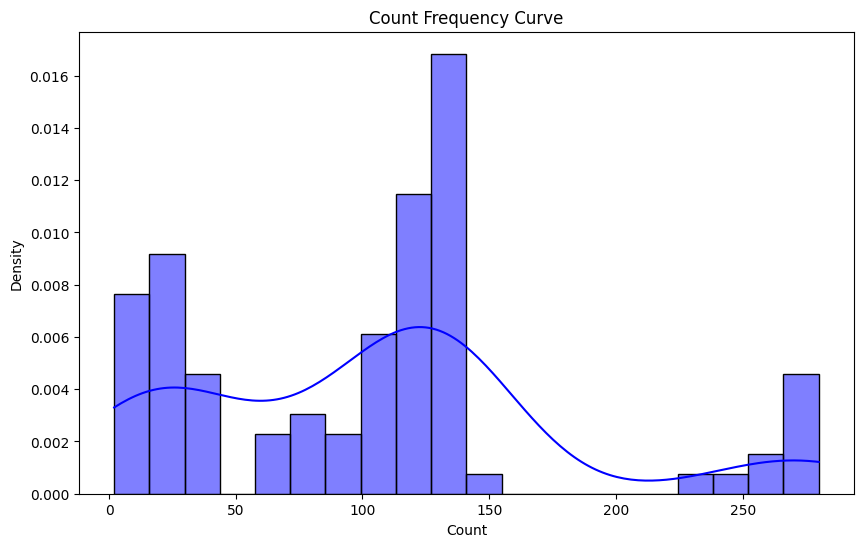

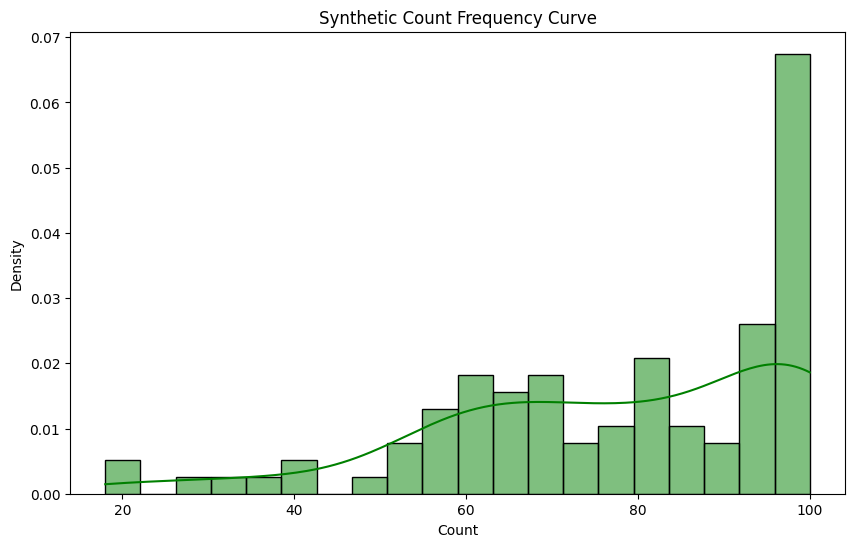

Statistic=0.894903806409337, p-value=1.5578595934679326e-06
Sample does not look Gaussian (reject H0)
    Category  Sub-Category  Count
0   Category  Sub-Category     54
1   Category  Sub-Category    100
2   Category  Sub-Category     85
3   Category  Sub-Category     68
4   Category  Sub-Category     70
..       ...           ...    ...
89  Category  Sub-Category     59
90  Category  Sub-Category     61
91  Category  Sub-Category    100
92  Category  Sub-Category     75
93  Category  Sub-Category     77

[94 rows x 3 columns]


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm, shapiro
import numpy as np

# Load the dataset with error handling
try:
    data = pd.read_csv('dataset.csv', on_bad_lines='skip', engine='python')
except pd.errors.ParserError as e:
    print(f"Error parsing file: {e}")

# Combine Category and Sub-Category into a single feature
data['Cat_SubCat'] = data['Category'] + '-' + data['Sub-Category']

# Count the occurrences of each category-subcategory combination
category_subcategory_counts = data['Cat_SubCat'].value_counts()

# Convert the Series to a DataFrame for better readability
category_subcategory_counts_df = category_subcategory_counts.reset_index()
category_subcategory_counts_df.columns = ['Cat_SubCat', 'Count']

# Function to safely split the combined feature into category and subcategory
def safe_split(cat_subcat):
    parts = cat_subcat.split('-', 1)
    if len(parts) == 2:
        return parts
    else:
        return [cat_subcat, '']

# Apply safe_split to each combined feature
category_subcategory_counts_df[['Category', 'Sub-Category']] = category_subcategory_counts_df['Cat_SubCat'].apply(safe_split).apply(pd.Series)

# Drop the combined feature column as we now have separate columns
category_subcategory_counts_df = category_subcategory_counts_df.drop(columns=['Cat_SubCat'])

# Sort the DataFrame by 'Count' in descending order
category_subcategory_counts_df = category_subcategory_counts_df.sort_values(by='Count', ascending=False)

# Extract counts for plotting
counts = category_subcategory_counts_df['Count']

# Plot the count frequency curve
plt.figure(figsize=(10, 6))
sns.histplot(counts, kde=True, stat="density", bins=20, color='blue', label='Counts')
plt.title('Count Frequency Curve')
plt.xlabel('Count')
plt.ylabel('Density')

# Estimate parameters for skew-normal distribution
skewness = 1.5  # Adjust skewness as desired
mean_count = counts.mean()
std_count = counts.std()
shape = skewness
scale = std_count / np.sqrt(1 + shape**2)
loc = mean_count - scale * shape * np.sqrt(2 / np.pi)

# Generate synthetic data following the skew-normal distribution
num_samples = len(counts)
synthetic_counts = skewnorm.rvs(shape, loc=loc, scale=scale, size=num_samples)

# Clip synthetic counts to be within the specified range [A, B]
A = 10  # Lower limit of frequency range
B = 100  # Upper limit of frequency range
synthetic_counts = np.clip(synthetic_counts, A, B)

# Round to the nearest integer and ensure all values are integers
synthetic_counts = np.round(synthetic_counts).astype(int)

# Plot the synthetic count frequency curve
plt.figure(figsize=(10, 6))
sns.histplot(synthetic_counts, kde=True, stat="density", bins=20, color='green', label='Synthetic Counts')
plt.title('Synthetic Count Frequency Curve')
plt.xlabel('Count')
plt.ylabel('Density')

# Show the plot
plt.show()

# Check for normal distribution visually and with a test (e.g., Shapiro-Wilk test)
stat, p = shapiro(synthetic_counts)
print(f'Statistic={stat}, p-value={p}')

# Interpret the p-value
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Create a synthetic dataset DataFrame
synthetic_data = pd.DataFrame({
    'Category': ['Category'] * num_samples,
    'Sub-Category': ['Sub-Category'] * num_samples,
    'Count': synthetic_counts
})

# Print the synthetic dataset
print(synthetic_data)


In [22]:
import pandas as pd
import numpy as np

# Synthetic data generated previously (replace this with your generated synthetic data)
synthetic_data = pd.DataFrame({
    'Category': ['Entertainment'] * 100 + ['Shopping Mall'] * 80 + ['Shop'] * 120,
    'Sub-Category': ['Movie Theater'] * 50 + ['Amusement Park'] * 50 +
                    ['Departmental Store'] * 40 + ['Jewelry Store'] * 40 +
                    ['Stationery'] * 60 + ['Clothing'] * 60,
    'Count': np.random.randint(10, 100, size=300)  # Replace with actual counts
})

# categories dictionary containing lists of categories and subcategories
categories = {
    "Shop": [
        "Stationery", "Diary", "Beauty Parlour", "Clothing", "Electronics",
        "Grocery", "Jewellery", "Furniture", "Sporting Goods", "Toys",
        "Pharmacy", "Convenience Store", "Hardware Store", "Shoe Store"
    ],
    "Shopping Mall": [
        "Departmental Store", "Jewelry Store", "Food Court", "Cinema"
    ],
    "Entertainment": [
        "Movie Theater", "Amusement Park", "Museum", "Sports Complex",
        "Concert Hall", "Zoo", "Comedy Club"
    ],
}

# Function to assign counts to each category and subcategory randomly
def assign_counts(categories, synthetic_data):
    assigned_data = []

    for category, subcategories in categories.items():
        for subcategory in subcategories:
            subset = synthetic_data.loc[
                (synthetic_data['Category'] == category) &
                (synthetic_data['Sub-Category'] == subcategory),
                'Count'
            ]
            if not subset.empty:
                count = subset.iloc[0]
                assigned_data.append({
                    'Category': category,
                    'Sub-Category': subcategory,
                    'Count': count
                })
            else:
                print(f"No matching data found for ({category}, {subcategory})")

    return pd.DataFrame(assigned_data)

# Assign counts to each category and subcategory
assigned_counts_df = assign_counts(categories, synthetic_data)

# Display the assigned counts DataFrame
print(assigned_counts_df)


No matching data found for (Shop, Diary)
No matching data found for (Shop, Beauty Parlour)
No matching data found for (Shop, Electronics)
No matching data found for (Shop, Grocery)
No matching data found for (Shop, Jewellery)
No matching data found for (Shop, Furniture)
No matching data found for (Shop, Sporting Goods)
No matching data found for (Shop, Toys)
No matching data found for (Shop, Pharmacy)
No matching data found for (Shop, Convenience Store)
No matching data found for (Shop, Hardware Store)
No matching data found for (Shop, Shoe Store)
No matching data found for (Shopping Mall, Food Court)
No matching data found for (Shopping Mall, Cinema)
No matching data found for (Entertainment, Museum)
No matching data found for (Entertainment, Sports Complex)
No matching data found for (Entertainment, Concert Hall)
No matching data found for (Entertainment, Zoo)
No matching data found for (Entertainment, Comedy Club)
        Category        Sub-Category  Count
0           Shop         

  Category    Sub-Category  Count
0     Shop      Stationery     82
1     Shop           Diary     81
2     Shop  Beauty Parlour     82
3     Shop        Clothing     89
4     Shop     Electronics     83


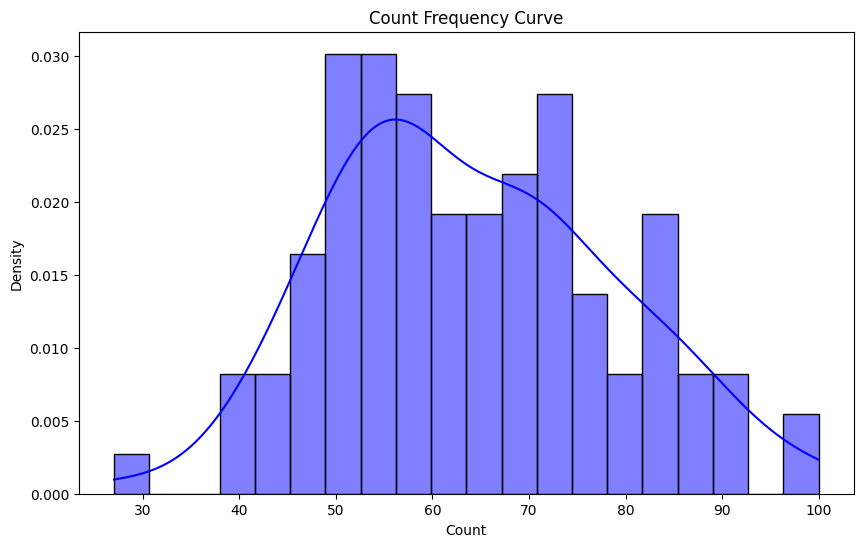

Statistic=0.9840777875947748, p-value=0.271991542284155
Sample looks Gaussian (fail to reject H0)


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm, shapiro

# Define categories and subcategories
categories = {
    "Shop": [
        "Stationery", "Diary", "Beauty Parlour", "Clothing", "Electronics",
        "Grocery", "Jewellery", "Furniture", "Sporting Goods", "Toys",
        "Pharmacy", "Convenience Store", "Hardware Store", "Shoe Store"
    ],
    "Shopping Mall": [
        "Departmental Store", "Jewelry Store", "Food Court", "Cinema"
    ],
    "Entertainment": [
        "Movie Theater", "Amusement Park", "Museum", "Sports Complex",
        "Concert Hall", "Zoo", "Comedy Club"
    ],
    "Office": [
        "Corporate Office", "Co-working Space", "Law Firm", "Accounting Firm",
        "Advertising Agency", "Non-Profit Organization", "Insurance Agency",
        "Travel Agency", "Media Company"
    ],
    "Pilgrimage Place": [
        "Temple", "Church", "Mosque", "Gurudwara", "Monastery", "Shrine"
    ],
    "Restaurant": [
        "Fast Food", "Fine Dining", "Cafe", "Bakery", "Bar", "Pub",
        "Food Truck", "Buffet", "Pizzeria", "Ice Cream Parlor"
    ],
    "Outdoor Space": [
        "Park", "Lake", "Forest", "Garden", "River", "Waterfall"
    ],
    "Transportation": [
        "Airport", "Train Station", "Bus Stop", "Taxi Stand"
    ],
    "Personal Care": [
        "Laundry", "Hair Salon"
    ],
    "Fitness & Wellness": [
        "Gym", "Yoga Studio"
    ],
    "Event Venue": [
        "Conference Center", "Convention Center", "Stadium", "Arena"
    ],
    "Hotel": [
        "Budget Hotel", "Mid-Range Hotel", "Luxury Hotel", "Hostel", "Resort", "Bed & Breakfast"
    ],
    "Hospital": [
        "General Hospital", "Specialty Hospital", "Children's Hospital",
        "Maternity Hospital", "Rehabilitation Center", "Mental Health Clinic",
        "Dental Clinic", "Eye Clinic", "Veterinary Clinic"
    ],
    "Educational Institute": [
        "School", "College", "University", "Art School", "Music School",
        "Tuition Center", "Dance School", "Driving School"
    ],
    "Financial Institution": [
        "Bank", "ATM", "Investment Firm"
    ],
    "Government Building": [
        "Post Office", "Police Station", "Fire Station", "Courthouse",
        "City Hall", "Library"
    ],
}

# Set parameters for skew-normal distribution
skewness = 1.5  # Adjust skewness as desired
mean_count = 50  # Mean of the distribution
std_count = 20  # Standard deviation of the distribution
A = 10  # Lower limit of frequency range
B = 100  # Upper limit of frequency range

# Generate synthetic counts following skew-normal distribution
num_samples = sum(len(subcats) for subcats in categories.values())
synthetic_counts = skewnorm.rvs(skewness, loc=mean_count, scale=std_count, size=num_samples)

# Clip synthetic counts to be within the specified range [A, B]
synthetic_counts = np.clip(synthetic_counts, A, B)

# Round to the nearest integer and ensure all values are integers
synthetic_counts = np.round(synthetic_counts).astype(int)

# Assign counts to each category and subcategory
assigned_data = []
for category, subcategories in categories.items():
    for subcategory in subcategories:
        assigned_data.append({
            'Category': category,
            'Sub-Category': subcategory,
            'Count': synthetic_counts[len(assigned_data)]
        })

# Create DataFrame from assigned data
assigned_counts_df = pd.DataFrame(assigned_data)

# Save assigned counts to CSV file
assigned_counts_df.to_csv('assigned_counts_skew_normal.csv', index=False)

# Display the first few rows of the DataFrame
print(assigned_counts_df.head())

# Plot the count frequency curve
plt.figure(figsize=(10, 6))
sns.histplot(assigned_counts_df['Count'], kde=True, stat="density", bins=20, color='blue', label='Counts')
plt.title('Count Frequency Curve')
plt.xlabel('Count')
plt.ylabel('Density')
plt.show()

# Check for normal distribution visually and with a test (e.g., Shapiro-Wilk test)
stat, p = shapiro(synthetic_counts)
print(f'Statistic={stat}, p-value={p}')

# Interpret the p-value
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


In [34]:
import pandas as pd
import numpy as np

# Define the descending order list of (Category, Sub-Category) pairs with counts
descending_order = [
    ('Educational Institute', 'School'), ('Educational Institute', 'Tuition Center'), 
    ('Fitness & Wellness', 'Gym'), ('Educational Institute', 'University'), 
    ('Educational Institute', 'College'), ('Educational Institute', 'Art School'), 
    ('Educational Institute', 'Music School'), ('Fitness & Wellness', 'Yoga Studio'), 
    ('Educational Institute', 'Driving School'), ('Educational Institute', 'Dance School'), 
    ('Outdoor Space', 'Park'), ('Restaurant', 'Cafe'), ('Office', 'Advertising Agency'), 
    ('Office', 'Travel Agency'), ('Office', 'Law Firm'), ('Transportation', 'Taxi Stand'), 
    ('Restaurant', 'Bakery'), ('Restaurant', 'Ice Cream Parlor'), ('Transportation', 'Bus Stop'), 
    ('Financial Institution', 'Bank'), ('Financial Institution', 'ATM'), ('Office', 'Media Company'), 
    ('Shop', 'Pharmacy'), ('Office', 'Corporate Office'), ('Outdoor Space', 'Garden'), 
    ('Restaurant', 'Fast Food'), ('Transportation', 'Airport'), ('Restaurant', 'Bar'), 
    ('Restaurant', 'Buffet'), ('Shop', 'Hardware Store'), ('Office', 'Accounting Firm'), 
    ('Shop', 'Shoe Store'), ('Office', 'Insurance Agency'), ('Office', 'Non-Profit Organization'), 
    ('Transportation', 'Railway Station'), ('Hotel', 'Hotels'), ('Restaurant', 'Fine Dining'), 
    ('Government Building', 'Police Station'), ('Government Building', 'Library'), 
    ('Shop', 'Diary'), ('Shop', 'Stationery'), ('Entertainment', 'Sports Complex'), 
    ('Shop', 'Beauty Parlour'), ('Shop', 'Clothing'), ('Shop', 'Electronics'), 
    ('Outdoor Space', 'Forest'), ('Fuel Station', 'Petrol Pump'), ('Personal Care', 'Hair Salon'), 
    ('Government Building', 'Post Office'), ('Event Venue', 'Stadium'), ('Personal Care', 'Laundry'), 
    ('Entertainment', 'Movie Theater'), ('Shop', 'Convenience Store'), ('Restaurant', 'Pub'), 
    ('Restaurant', 'Pizzeria'), ('Outdoor Space', 'Lake'), ('Hotel', 'Hostels for staying near me'), 
    ('Government Building', 'City Hall'), ('Financial Institution', 'Investment Firm'), 
    ('Fuel Station', 'LPG Station'), ('Entertainment', 'Amusement Park'), ('Office', 'Co-working Space'), 
    ('Event Venue', 'Conference Center'), ('Event Venue', 'Arena'), ('Entertainment', 'Museum'), 
    ('Entertainment', 'Zoo'), ('Outdoor Space', 'River'), ('Pilgrimage Place', 'Temple'), 
    ('Event Venue', 'Convention Center'), ('Restaurant', 'Food Truck'), 
    ('Fuel Station', 'Electrical Charging Station'), ('Pilgrimage Place', 'Church'), 
    ('Pilgrimage Place', 'Gurudwara'), ('Hospital', 'Mental Health Clinic'), 
    ('Hospital', 'Rehabilitation Center'), ('Hospital', 'General Hospital'), 
    ('Hotel', 'Resorts '), ('Hospital', 'Maternity Hospital'), 
    ('Government Building', 'Fire Station'), ('Government Building', 'Courthouse'), 
    ('Hospital', 'Dental Clinic'), ("Hospital", "Children's Hospital"), 
    ('Entertainment', 'Comedy Club'), ('Hospital', 'Eye Clinic'), ('Pilgrimage Place', 'Shrine'), 
    ('Pilgrimage Place', 'Mosque'), ('Entertainment', 'Concert Hall'), 
    ('Hospital', 'Veterinary Clinic'), ('Hospital', 'Specialty Hospital'), 
    ('Shopping Mall', 'Jewelry Store'), ('Shopping Mall', 'Departmental Store'), 
    ('Hotel', 'Budget Hotel'), ('Pilgrimage Place', 'Monastery')
]

# Create a DataFrame from the descending order list
descending_df = pd.DataFrame(descending_order, columns=['Category', 'Sub-Category'])

# Function to assign counts to each category and subcategory following a normal distribution
def assign_counts_normal(categories, descending_df, mean, std_dev, skewness):
    assigned_data = []

    for category, subcategory in descending_df.values:
        # Generate a random sample from a skew-normal distribution
        shape = skewness
        scale = std_dev / np.sqrt(1 + shape**2)
        loc = mean - scale * shape * np.sqrt(2 / np.pi)
        count = skewnorm.rvs(shape, loc=loc, scale=scale)
        count = int(np.round(count))  # Round to the nearest integer

        # Ensure the count is within a reasonable range
        count = max(10, min(100, count))  # Clip between 10 and 100

        assigned_data.append({
            'Category': category,
            'Sub-Category': subcategory,
            'Count': count
        })

    return pd.DataFrame(assigned_data)

# Parameters for the normal distribution
mean_count = 50  # Mean of the distribution
std_deviation = 20  # Standard deviation of the distribution
skewness = 1.5  # Skewness parameter

# Assign counts following a normal distribution with skewness
assigned_counts_df = assign_counts_normal(categories, descending_df, mean_count, std_deviation, skewness)

# Save the assigned counts DataFrame to a CSV file
assigned_counts_df.to_csv('assigned_counts_normal.csv', index=False)

# Display the assigned counts DataFrame
print(assigned_counts_df)


                 Category        Sub-Category  Count
0   Educational Institute              School     40
1   Educational Institute      Tuition Center     34
2      Fitness & Wellness                 Gym     36
3   Educational Institute          University     42
4   Educational Institute             College     42
..                    ...                 ...    ...
88               Hospital  Specialty Hospital     54
89          Shopping Mall       Jewelry Store     50
90          Shopping Mall  Departmental Store     34
91                  Hotel        Budget Hotel     59
92       Pilgrimage Place           Monastery     33

[93 rows x 3 columns]


                 Category        Sub-Category  Count
0   Educational Institute              School    410
1   Educational Institute      Tuition Center    360
2      Fitness & Wellness                 Gym    440
3   Educational Institute          University    460
4   Educational Institute             College    380
..                    ...                 ...    ...
88               Hospital  Specialty Hospital    390
89          Shopping Mall       Jewelry Store    340
90          Shopping Mall  Departmental Store    330
91                  Hotel        Budget Hotel    430
92       Pilgrimage Place           Monastery    410

[93 rows x 3 columns]
Statistic=0.9886244983452859, p-value=0.6072100245952726
Sample looks Gaussian (fail to reject H0)


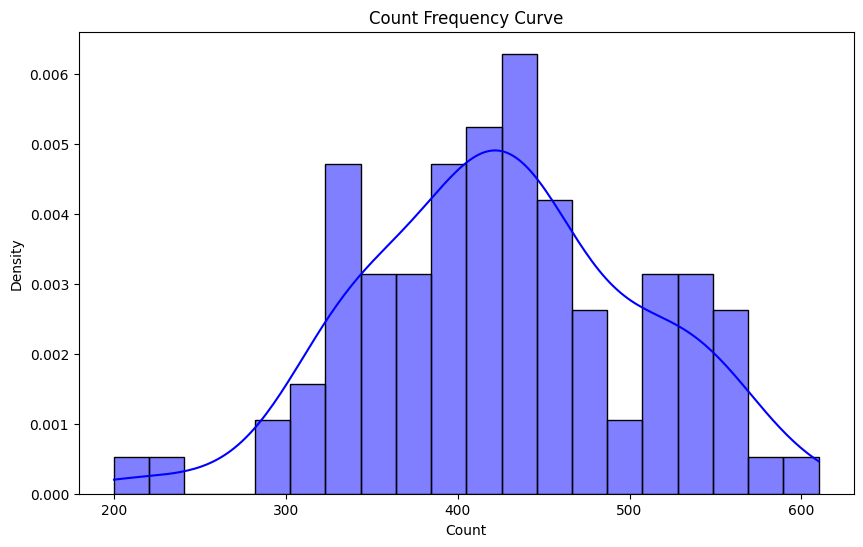

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm, shapiro

# Define the descending order list of (Category, Sub-Category) pairs with counts
descending_order = [
    ('Educational Institute', 'School'), ('Educational Institute', 'Tuition Center'), 
    ('Fitness & Wellness', 'Gym'), ('Educational Institute', 'University'), 
    ('Educational Institute', 'College'), ('Educational Institute', 'Art School'), 
    ('Educational Institute', 'Music School'), ('Fitness & Wellness', 'Yoga Studio'), 
    ('Educational Institute', 'Driving School'), ('Educational Institute', 'Dance School'), 
    ('Outdoor Space', 'Park'), ('Restaurant', 'Cafe'), ('Office', 'Advertising Agency'), 
    ('Office', 'Travel Agency'), ('Office', 'Law Firm'), ('Transportation', 'Taxi Stand'), 
    ('Restaurant', 'Bakery'), ('Restaurant', 'Ice Cream Parlor'), ('Transportation', 'Bus Stop'), 
    ('Financial Institution', 'Bank'), ('Financial Institution', 'ATM'), ('Office', 'Media Company'), 
    ('Shop', 'Pharmacy'), ('Office', 'Corporate Office'), ('Outdoor Space', 'Garden'), 
    ('Restaurant', 'Fast Food'), ('Transportation', 'Airport'), ('Restaurant', 'Bar'), 
    ('Restaurant', 'Buffet'), ('Shop', 'Hardware Store'), ('Office', 'Accounting Firm'), 
    ('Shop', 'Shoe Store'), ('Office', 'Insurance Agency'), ('Office', 'Non-Profit Organization'), 
    ('Transportation', 'Railway Station'), ('Hotel', 'Hotels'), ('Restaurant', 'Fine Dining'), 
    ('Government Building', 'Police Station'), ('Government Building', 'Library'), 
    ('Shop', 'Diary'), ('Shop', 'Stationery'), ('Entertainment', 'Sports Complex'), 
    ('Shop', 'Beauty Parlour'), ('Shop', 'Clothing'), ('Shop', 'Electronics'), 
    ('Outdoor Space', 'Forest'), ('Fuel Station', 'Petrol Pump'), ('Personal Care', 'Hair Salon'), 
    ('Government Building', 'Post Office'), ('Event Venue', 'Stadium'), ('Personal Care', 'Laundry'), 
    ('Entertainment', 'Movie Theater'), ('Shop', 'Convenience Store'), ('Restaurant', 'Pub'), 
    ('Restaurant', 'Pizzeria'), ('Outdoor Space', 'Lake'), ('Hotel', 'Hostels for staying near me'), 
    ('Government Building', 'City Hall'), ('Financial Institution', 'Investment Firm'), 
    ('Fuel Station', 'LPG Station'), ('Entertainment', 'Amusement Park'), ('Office', 'Co-working Space'), 
    ('Event Venue', 'Conference Center'), ('Event Venue', 'Arena'), ('Entertainment', 'Museum'), 
    ('Entertainment', 'Zoo'), ('Outdoor Space', 'River'), ('Pilgrimage Place', 'Temple'), 
    ('Event Venue', 'Convention Center'), ('Restaurant', 'Food Truck'), 
    ('Fuel Station', 'Electrical Charging Station'), ('Pilgrimage Place', 'Church'), 
    ('Pilgrimage Place', 'Gurudwara'), ('Hospital', 'Mental Health Clinic'), 
    ('Hospital', 'Rehabilitation Center'), ('Hospital', 'General Hospital'), 
    ('Hotel', 'Resorts '), ('Hospital', 'Maternity Hospital'), 
    ('Government Building', 'Fire Station'), ('Government Building', 'Courthouse'), 
    ('Hospital', 'Dental Clinic'), ("Hospital", "Children's Hospital"), 
    ('Entertainment', 'Comedy Club'), ('Hospital', 'Eye Clinic'), ('Pilgrimage Place', 'Shrine'), 
    ('Pilgrimage Place', 'Mosque'), ('Entertainment', 'Concert Hall'), 
    ('Hospital', 'Veterinary Clinic'), ('Hospital', 'Specialty Hospital'), 
    ('Shopping Mall', 'Jewelry Store'), ('Shopping Mall', 'Departmental Store'), 
    ('Hotel', 'Budget Hotel'), ('Pilgrimage Place', 'Monastery')
]

# Create a DataFrame from the descending order list
descending_df = pd.DataFrame(descending_order, columns=['Category', 'Sub-Category'])

# Function to assign counts to each category and subcategory following a normal distribution
def assign_counts_normal(categories, descending_df, mean, std_dev, skewness):
    assigned_data = []

    for category, subcategory in descending_df.values:
        # Generate a random sample from a skew-normal distribution
        shape = skewness
        scale = std_dev / np.sqrt(1 + shape**2)
        loc = mean - scale * shape * np.sqrt(2 / np.pi)
        count = skewnorm.rvs(shape, loc=loc, scale=scale)
        count = int(np.round(count))  # Round to the nearest integer

        # Ensure the count is within a reasonable range
        count = max(10, min(100, count))  # Clip between 10 and 100

        assigned_data.append({
            'Category': category,
            'Sub-Category': subcategory,
            'Count': count*10
        })

    return pd.DataFrame(assigned_data)

# Parameters for the normal distribution
mean_count = 50  # Mean of the distribution
std_deviation = 20  # Standard deviation of the distribution
skewness = 1.5  # Skewness parameter

# Assign counts following a normal distribution with skewness
assigned_counts_df = assign_counts_normal(categories, descending_df, mean_count, std_deviation, skewness)

# Save the assigned counts DataFrame to a CSV file
assigned_counts_df.to_csv('assigned_counts_normal.csv', index=False)

# Display the assigned counts DataFrame
print(assigned_counts_df)

# Statistical analysis and visualization
# Plot the count frequency curve
plt.figure(figsize=(10, 6))
sns.histplot(assigned_counts_df['Count'], kde=True, stat="density", bins=20, color='blue', label='Counts')
plt.title('Count Frequency Curve')
plt.xlabel('Count')
plt.ylabel('Density')

# Check for normal distribution visually and with a test (e.g., Shapiro-Wilk test)
stat, p = shapiro(assigned_counts_df['Count'])
print(f'Statistic={stat}, p-value={p}')

# Interpret the p-value
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Show the plot
plt.show()


                 Category        Sub-Category  Count
0   Educational Institute              School   1000
1   Educational Institute      Tuition Center   1000
2      Fitness & Wellness                 Gym   1000
3   Educational Institute          University   1000
4   Educational Institute             College   1000
..                    ...                 ...    ...
88               Hospital  Specialty Hospital   1000
89          Shopping Mall       Jewelry Store   1000
90          Shopping Mall  Departmental Store   1000
91                  Hotel        Budget Hotel   1000
92       Pilgrimage Place           Monastery   1000

[93 rows x 3 columns]
Statistic=1.0, p-value=1.0
Sample looks Gaussian (fail to reject H0)


C:\Users\Sarva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


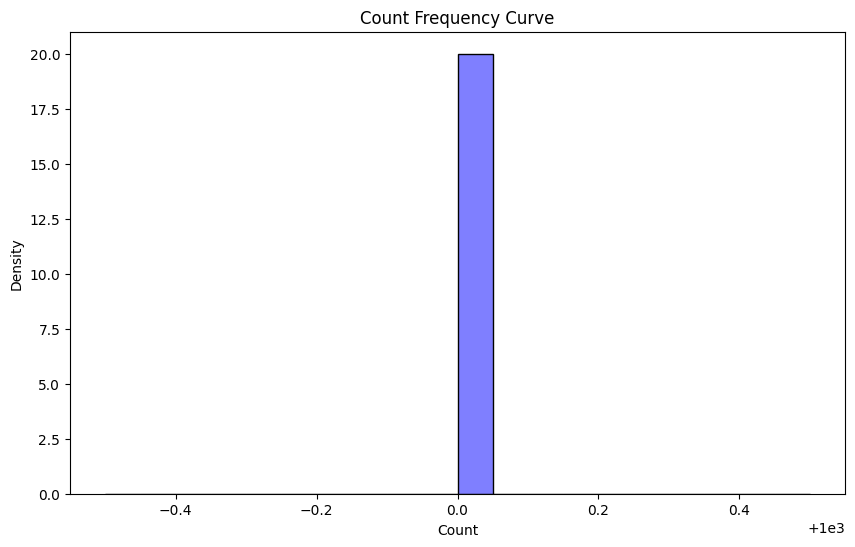

In [49]:
import numpy as np
import pandas as pd
from collections import Counter

# Number of rows
num_rows = 10000

# Random seed for reproducibility
np.random.seed(48)

# Generate random coordinates
x = np.random.uniform(0, 100, num_rows)
y = np.random.uniform(0, 100, num_rows)

# Generate random features
features = [f'feature_{i}' for i in range(1, 101)]
feature_column = np.random.choice(features, num_rows)

# Calculate the weight based on the frequency of each feature
feature_counts = Counter(feature_column)
weights = np.array([1 / feature_counts[feature] for feature in feature_column])

# Generate random ratings between 1 and 5
ratings = np.random.uniform(1, 5, num_rows)

# Create the DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y,
    'feature': feature_column,
    'weight': weights,
    'rating': ratings
})

# Save the DataFrame to a CSV file
df.to_csv('custom_dataset3.csv', index=False)

print("Dataset created and saved to 'custom_dataset.csv'")

Dataset created and saved to 'custom_dataset.csv'


In [45]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Load the dataset
df = pd.read_csv('custom_dataset3.csv')

# Define the custom distance metric
def custom_distance(point1, point2, w=0.5, r=0.5):
    # point1 and point2 are arrays: [x, y, weight, rating]
    distance = np.sqrt((point1[0] - point2[0])*2 + (point1[1] - point2[1])*2)
    weight_factor = (point1[2] + point2[2]) / 2  # Average weight
    rating_factor = (point1[3] + point2[3]) / 2  # Average rating
    return ((w * r) + (weight_factor * distance * (1 / rating_factor)) / (r + (weight_factor * distance)))

# Extract relevant columns for KNN
data = df[['x', 'y', 'weight', 'rating']].values  # Extract as numpy array

# Fit the KNN model
knn = NearestNeighbors(metric=custom_distance)
knn.fit(data)

# Function to find k distinct features based on the input feature
def find_k_distinct_features(input_feature, k=5):
    # Get the corresponding row(s) for the given input feature
    query_indices = df.index[df['feature'] == input_feature].tolist()
    if not query_indices:
        return None
    
    query_point = data[query_indices[0]]  # Use the first matching row for query
    distances, indices = knn.kneighbors([query_point], n_neighbors=len(df))
    
    # Get the features of the nearest neighbors
    nearest_features = df.iloc[indices[0]]['feature'].values
    
    # Select k distinct features
    distinct_features = []
    seen_features = set()
    for feature in nearest_features:
        if feature not in seen_features:
            distinct_features.append(feature)
            seen_features.add(feature)
        if len(distinct_features) == k:
            break
    
    return distinct_features

# Example usage
input_feature = 'feature_3'
k = 2
distinct_features = find_k_distinct_features(input_feature, k)
print(f"The {k} distinct features nearest to '{input_feature}' are: {distinct_features}")

##like this for a given feature I get k features from z datasets of name custom_datset_i
##for each datset find n features and do classifictaioon (decision tree and naive bayes calsifie)for the features also each dataset has a scorerating take into account that more rating more are prone is featuselected lat give k_final feature

C:\Users\Sarva\AppData\Local\Temp\ipykernel_13704\2070827771.py:11: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((point1[0] - point2[0])*2 + (point1[1] - point2[1])*2)


The 2 distinct features nearest to 'feature_3' are: ['feature_3', 'feature_48']


C:\Users\Sarva\AppData\Local\Temp\ipykernel_13704\2070827771.py:11: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((point1[0] - point2[0])*2 + (point1[1] - point2[1])*2)


In [47]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Define the custom distance metric
def custom_distance(point1, point2, w=0.5, r=0.5):
    # point1 and point2 are arrays: [x, y, weight, rating]
    distance = np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    weight_factor = (point1[2] + point2[2]) / 2  # Average weight
    rating_factor = (point1[3] + point2[3]) / 2  # Average rating
    return ((w * r) + (weight_factor * distance * (1 / rating_factor)) / (r + (weight_factor * distance)))

# Load the datasets
datasets = [pd.read_csv(f'custom_dataset3.csv') for i in range(1, 4)]

# Function to find k nearest features in a single dataset
def find_k_nearest_features(df, input_feature, k=5):
    data = df[['x', 'y', 'weight', 'rating']].values  # Extract as numpy array
    knn = NearestNeighbors(metric=custom_distance)
    knn.fit(data)

    query_indices = df.index[df['feature'] == input_feature].tolist()
    if not query_indices:
        return None

    query_point = data[query_indices[0]]  # Use the first matching row for query
    distances, indices = knn.kneighbors([query_point], n_neighbors=len(df))
    
    nearest_features = df.iloc[indices[0]]['feature'].values
    return nearest_features[:k]  # Return the top k features

# Function to find k nearest features across all datasets
def find_k_nearest_features_across_datasets(datasets, input_feature, k=5):
    combined_features = []
    for df in datasets:
        nearest_features = find_k_nearest_features(df, input_feature, k)
        if nearest_features is not None:
            combined_features.extend(nearest_features)
    
    # Deduplicate features and consider rating scores
    combined_features = list(set(combined_features))
    return combined_features[:k]  # Return the top k features

# Example usage
input_feature = 'feature_3'
k = 5
final_features = find_k_nearest_features_across_datasets(datasets, input_feature, k)
print(f"The {k} nearest features to '{input_feature}' across all datasets are: {final_features}")


The 5 nearest features to 'feature_3' across all datasets are: ['feature_90', 'feature_3', 'feature_64', 'feature_99']


In [53]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Function to load datasets
def load_datasets(file_names):
    datasets = [pd.read_csv(file_name) for file_name in file_names]
    return datasets

# Define the custom distance metric
def custom_distance(point1, point2, w=0.5, r=0.5):
    # point1 and point2 are arrays: [x, y, weight, rating]
    distance = np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    weight_factor = (point1[2] + point2[2]) / 2  # Average weight
    rating_factor = (point1[3] + point2[3]) / 2  # Average rating
    return ((w * r) + (weight_factor * distance * (1 / rating_factor)) / (r + (weight_factor * distance)))

# Function to find k distinct features based on the input feature
def find_k_distinct_features(df, knn, data, input_feature, k=5):
    query_indices = df.index[df['feature'] == input_feature].tolist()
    if not query_indices:
        return None
    
    query_point = data[query_indices[0]]  # Use the first matching row for query
    distances, indices = knn.kneighbors([query_point], n_neighbors=len(df))
    
    nearest_features = df.iloc[indices[0]]['feature'].values
    
    distinct_features = []
    seen_features = set()
    for feature in nearest_features:
        if feature not in seen_features:
            distinct_features.append(feature)
            seen_features.add(feature)
        if len(distinct_features) == k:
            break
    
    return distinct_features

# Main logic
datasets = ['custom_dataset1.csv', 'custom_dataset2.csv', 'custom_dataset3.csv']
scoreratings = [334, 444, 239]

# Load datasets
dfs = load_datasets(new.csv)

# Example input feature and k value
input_feature = 'feature_3'
k = 2

# Find distinct features for each dataset
all_distinct_features = []
for i, df in enumerate(dfs):
    data = df[['x', 'y', 'weight', 'rating']].values  # Extract as numpy array
    knn = NearestNeighbors(metric=custom_distance)
    knn.fit(data)
    
    distinct_features = find_k_distinct_features(df, knn, data, input_feature, k)
    all_distinct_features.extend(distinct_features)

# Consider the score ratings to select the most relevant features
selected_features = sorted(all_distinct_features, key=lambda x: scoreratings[all_distinct_features.index(x) % len(scoreratings)], reverse=True)[:k]

# Combine datasets for classification
combined_df = pd.concat(dfs, ignore_index=True)

# Train and evaluate Decision Tree and Naive Bayes classifiers
X = combined_df[selected_features].values
y = combined_df['label'].values  # Assuming the datasets have a 'label' column for classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

print(f"Selected features: {selected_features}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Naive Bayes Accuracy: {nb_accuracy}")


NameError: name 'new' is not defined